In [74]:
import pandas as pd
from database.market import Market
import requests as r
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [38]:
data = pd.read_csv("20151117.csv")
market = Market()

In [39]:
data.columns

Index(['Date', 'Timestamp', 'Ticker', 'OpenPrice', 'HighPrice', 'LowPrice',
       'ClosePrice', 'TotalVolume', 'TotalQuantity', 'TotalTradeCount'],
      dtype='object')

In [40]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

In [41]:
data["hour"] = [x.hour for x in data["Timestamp"]]
data["dayOfWeek"] = [x.weekday() for x in data["Timestamp"]]

In [42]:
grouped = data.groupby("hour").mean().reset_index()

In [43]:
grouped

,hour,Date,OpenPrice,HighPrice,LowPrice,ClosePrice,TotalVolume,TotalQuantity,TotalTradeCount,dayOfWeek
0,4,20151117.0,57.138889,57.140370,57.137778,57.139259,3.661883e+04,1097.814815,2.148148,3.0
1,5,20151117.0,40.263913,40.263913,40.256087,40.256087,2.748437e+04,1037.347826,2.304348,3.0
2,6,20151117.0,64.995000,65.010625,64.986667,65.000417,8.005764e+04,2218.979167,5.354167,3.0
3,7,20151117.0,60.356988,60.384903,60.331429,60.359189,3.083385e+05,9105.768340,11.104247,3.0
4,8,20151117.0,63.085981,63.113084,63.067477,63.091277,4.596798e+05,13209.087227,27.637072,3.0
5,9,20151117.0,79.243232,79.315156,79.173463,79.244047,7.474311e+05,14636.277366,68.142632,3.0
6,10,20151117.0,80.758255,80.801599,80.718976,80.762807,5.907576e+05,11443.040585,58.364963,3.0
7,11,20151117.0,80.164743,80.193754,80.135487,80.164961,4.574652e+05,8971.737379,46.203886,3.0
8,12,20151117.0,79.474422,79.498822,79.448184,79.472543,3.943150e+05,7430.900110,39.534999,3.0
9,13,20151117.0,79.238012,79.263759,79.212834,79.238208,3.526604e+05,6801.603428,37.799327,3.0


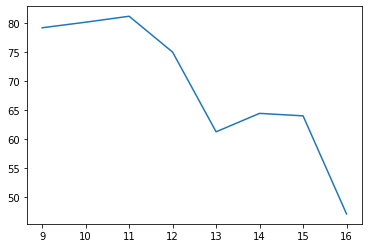

In [44]:
plt.plot(grouped["ClosePrice"][9:])

In [51]:
market.connect()
prices = market.retrieve_data("prices")
market.close()

In [57]:
prices["date"] = pd.to_datetime(prices["date"])
prices["dayofWeek"] = [x.weekday() + 1 for x in prices["date"]]
prices["quarter"] = [x.quarter + 1 for x in prices["date"]]
prices["monthly"] = [x.month + 1for x in prices["date"]]
prices["year"] = [x.year + 1for x in prices["date"]]

In [58]:
daily = prices.groupby(["year","dayofWeek"]).mean().reset_index()
quarterly = prices.groupby(["year","quarter"]).mean().reset_index()
monthly = prices.groupby(["year","monthly"]).mean().reset_index()

<ipython-input-78-e3cf7c724c22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["adjClose"] = normalize([subset["adjClose"]])[0]
<ipython-input-78-e3cf7c724c22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["adjClose"] = normalize([subset["adjClose"]])[0]
<ipython-input-78-e3cf7c724c22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

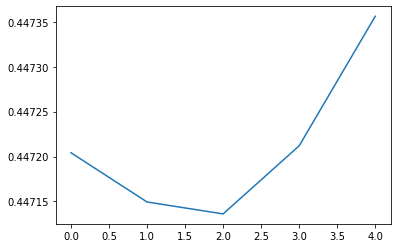

In [78]:
normalized = []
for year in daily["year"].unique():
    subset = daily[daily["year"] == year]
    subset["adjClose"] = normalize([subset["adjClose"]])[0]
    normalized.append(subset)
grouped = pd.concat(normalized).groupby("dayofWeek").mean().reset_index()
plt.plot(grouped["adjClose"])

<ipython-input-86-46f1b22368e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["adjClose"] = normalize([subset["adjClose"].copy()])[0]
<ipython-input-86-46f1b22368e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["adjClose"] = normalize([subset["adjClose"].copy()])[0]
<ipython-input-86-46f1b22368e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

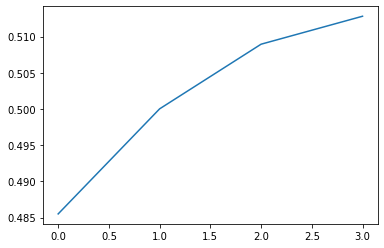

In [86]:
normalized = []
for year in quarterly["year"].unique():
    subset = quarterly[quarterly["year"] == year]
    subset["adjClose"] = normalize([subset["adjClose"].copy()])[0]
    normalized.append(subset)
grouped = pd.concat(normalized).groupby("quarter").mean().reset_index()
plt.plot(grouped["adjClose"])

<ipython-input-85-1d41d5565a3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["adjClose"] = normalize([subset["adjClose"]])[0]
<ipython-input-85-1d41d5565a3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["adjClose"] = normalize([subset["adjClose"]])[0]
<ipython-input-85-1d41d5565a3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

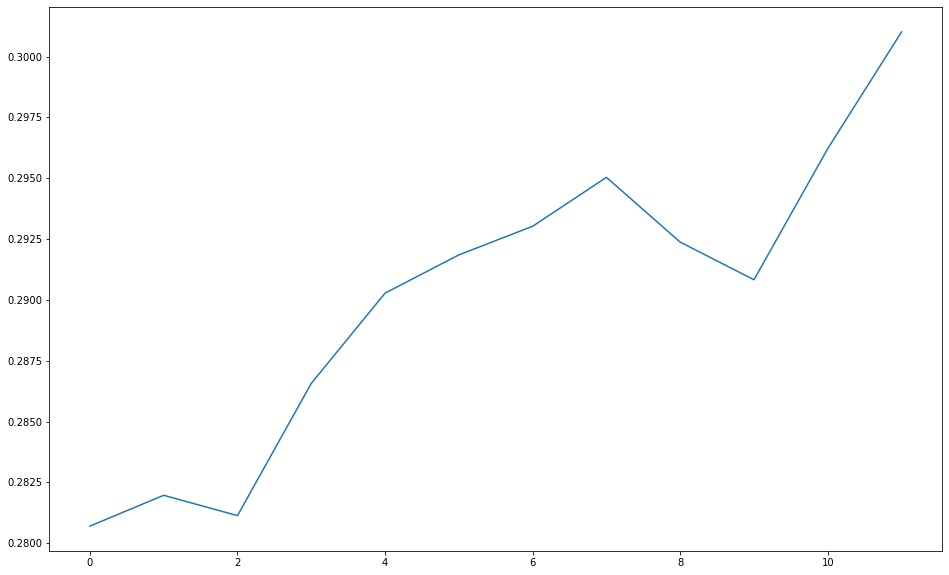

In [85]:
normalized = []
for year in monthly["year"].unique():
    subset = monthly[monthly["year"] == year]
    subset["adjClose"] = normalize([subset["adjClose"]])[0]
    normalized.append(subset)
grouped = pd.concat(normalized).groupby("monthly").mean().reset_index()
plt.figure(figsize=(16,10))
plt.plot(grouped["adjClose"])
